In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize


In [3]:
def f(x):
  return np.cos(x)**2

In [4]:
def composite_simpson(a, b, n, f):
  k = n - 1 #кол-во промежутков разбиения 
  h = (b-a)/k #шаг разбиения 
  x_nodes = [(a + h*i) for i in range (0,n)]
  sum1 = 2* np.sum([f(x_nodes[2*i]) for i in range (1, int(k/2))]) #сумма значений функции в нечетных узлах 
  sum2 = 4 * np.sum([f(x_nodes[2*i-1]) for i in range (1, int(k/2)+1)]) #сумма значений функции в четных узлах 
  return h/3*(f(x_nodes[0]) + sum1 + sum2 + f(x_nodes[len(x_nodes)-1]))


In [5]:
def composite_trapezoid(a, b, n, f):
  k = n - 1 #кол-во промежутков разбиения 
  h = (b-a)/k #шаг разбиения 
  x_nodes = [(a + h*i) for i in range (0, n)]
  sum1 = 2* np.sum([f(x_nodes[i]) for i in range (1, n-1)]) #сумма значений функции в нечетных узлах 
  return h/2*(f(x_nodes[0]) + sum1 + f(x_nodes[len(x_nodes)-1]))

In [6]:
a = -1/2
b = 1/2
n = 9
k = n - 1
h = (b-a)/k
x_nodes = [(a + h*i) for i in range (0,n)]
composite_trapezoid(a, b, n, f)
#print(2 * np.sum([f([x_nodes[2*i]) for i in range (1, int(k/2))]]))
#print(x_nodes[2*i+1])
#sum1 = np.sum ([np.cos(x_nodes[2*i+1]) for i in range (1, k/2)])

0.9185418756761135

In [7]:
def func1(t):
  return (1/np.sqrt(2*9.8))*np.sqrt((1+((np.sin(2*t))/(1-np.cos(2*t)))**2)/(1/2 *C * (1-np.cos(2*t))))*C*(1-np.cos(2*t))

In [8]:
a = 10e-7
T = 1.75418438
C = 1.03439984
exact_value_of_integral = np.sqrt(2*C/9.8)* (T - a)
print(exact_value_of_integral)

0.8059742639454386


In [9]:
def mod_composite_simpson(h, n, func):
  if n % 2 == 0:
    n += 1
  t = [10e-7 + i*h for i in range (0, n)]
  sum1 = 0
  sum2 = 0
  for i in range (1, n-1):
    if i % 2 == 0:
      sum1 = sum1 + func(t[i]) #сумма значений функции в нечетных узлах 
    else:
      sum2 = sum2 + func(t[i]) #сумма значений функции в четных узлах 
  return h/3*(func(t[0]) + 2 * sum1 + 4 * sum2 + func(t[n-1]))

In [10]:
def mod_composite_trapezoid(h, n, func):
  if n % 2 == 0:
    n += 1
  t = [10e-7 + i*h for i in range (0, n)]
  sum1 = 2* np.sum([func(t[i]) for i in range (1, n-1)]) #сумма значений функции в нечетных узлах 
  return h/2*(func(t[0])+ sum1 + func(t[n-1]))

In [29]:
def func3(t):
  return np.exp(t)

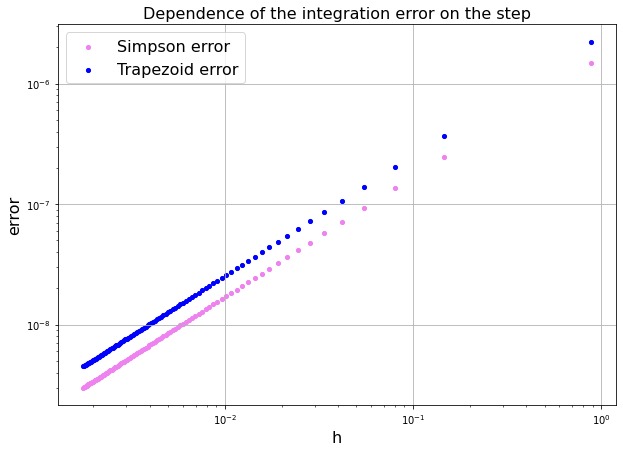

In [32]:
a = 10e-7
b = 1.75418438
plt.figure(figsize = (10, 7))
plt.loglog()
plt.title("Dependence of the integration error on the step", fontsize = 16)
for i in range (3, 1000, 10):
  k = i - 1
  h = (b-a)/k
  approx_value = mod_composite_simpson(h, i, func1)
  line1 = plt.scatter(h, abs((approx_value - exact_value_of_integral)), s = 17, color = 'violet')


for i in range (3, 1000, 10):
  k = i - 1
  h = (b-a)/k
  approx_value = mod_composite_trapezoid(h, i, func1)
  line2 = plt.scatter(h, abs((approx_value - exact_value_of_integral)), s = 17, color = 'blue')
line1.set_label("Simpson error")
line2.set_label("Trapezoid error")
h_for_scaling = np.logspace(-3, -2, 100)
#plt.loglog(h_for_scaling, h_for_scaling**2, 'k-', linewidth = 2, label =r'$O(h^2)$')
#plt.loglog(h_for_scaling, h_for_scaling**3, 'k-', linewidth = 2, label =r'$O(h^3)$')
#plt.loglog(h_for_scaling, 10**(-2)*h_for_scaling**4, 'k--', linewidth = 2, label =r'$O(h^4)$')
plt.legend(fontsize = 16)
plt.xlabel('h',fontsize = 16 )
plt.ylabel('error', fontsize = 16)
plt.grid()
plt.show()

In [35]:
def l_i(x, x_cur, x_ncur):
  k = (x - x_ncur)/(x_cur - x_ncur)
  #print(k)
  return (x - x_ncur)/(x_cur - x_ncur)

def L(x, x_nodes, y_nodes):
  for i in range (0, len(x_nodes)-1):
    if (x_nodes[i]<= x <= x_nodes[i+1]):
      return y_nodes[i]*l_i(x, x_nodes[i] , x_nodes[i+1]) + y_nodes[i+1]*l_i(x, x_nodes[i+1], x_nodes[i])



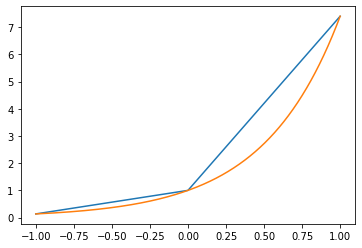

In [ ]:
def func2(x):
  return 2.72**(2*x)
t = np.linspace(-1, 1, 3)
f2 = [func2(t[i]) for i in range (0, len(t))]
t1 = np.linspace(-0.99999, 1, 1000)
interp_lagr = [L(t1[i], t, f2) for i in range (0, len(t1))] 
plt.plot(t1, interp_lagr)
plt.plot(t1, func2(t1))

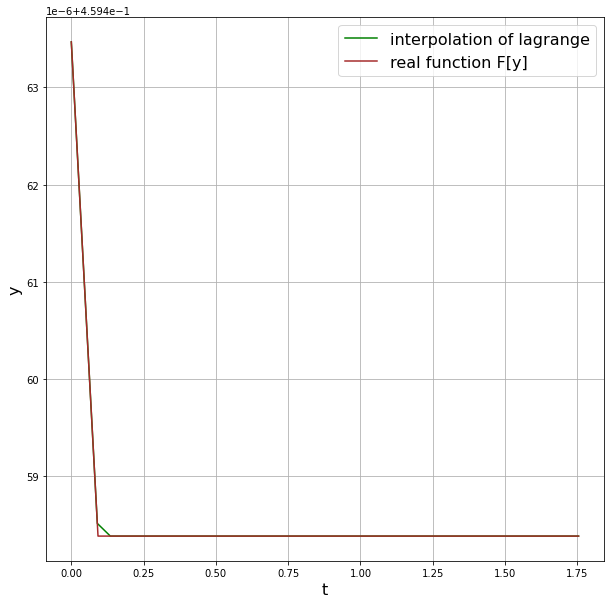

In [38]:
plt.subplots(figsize = (10, 10))
a = 10e-7
b = 1.75418438
t = np.linspace(a, b, 20)
f1 = [func1(t[i]) for i in range (0, len(t))]
t1 = np.linspace(a, b, len(t)*2)
interp_lagr = [L(t1[i], t, f1) for i in range (0, len(t1))]
plt.plot(t1, interp_lagr, label = 'interpolation of lagrange', color = 'green') 
plt.plot(t, func1(t), label = 'real function F[y]', color = 'brown')
plt.legend(fontsize = 16)
plt.xlabel('t',fontsize = 16 )
plt.ylabel('y',fontsize = 16 )
plt.grid()
plt.show()

In [40]:
def mod1_composite_simpson(r, n, f1, L, t):

  sum1 = 0
  sum2 = 0
  for i in range (1, n-1):
    if i % 2 == 0:
      sum1 = sum1 + L(t1[i], t, f1)  #сумма значений функции в нечетных узлах 
    else:
      sum2 = sum2 + L(t1[i], t, f1) #сумма значений функции в четных узлах 
  return r/3*(L(t[0], t, f1) + 2 * sum1 + 4 * sum2 + L(t[len(t)-1], t, f1))


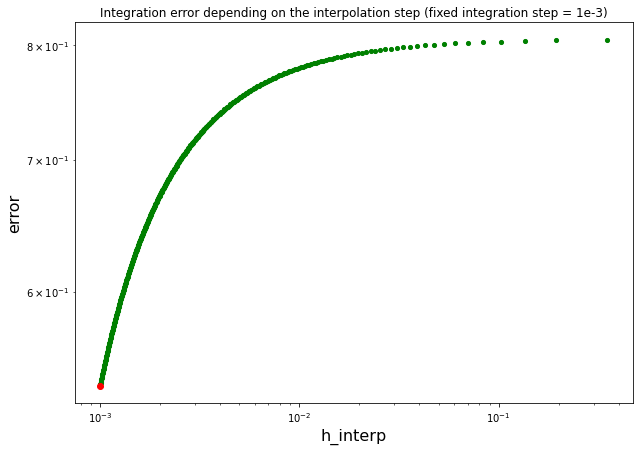

In [71]:
a = 10e-7
b = 1.75418438
T = 1.75418438
C = 1.03439984
approx_value = 0
exact_value_of_integral = np.sqrt(2*C/9.8)* (T - a)
steps = []
errors = []
plt.figure(figsize = (10, 7))
plt.loglog()
plt.title("Integration error depending on the interpolation step (fixed integration step = 1e-3)")
r = 10**(-3)
for i in range (2, 877, 2):
  t = np.linspace(a, b, i)
  t1 = np.linspace(a, b, 2*len(t)+1)
  i = int(len(t1)/len(t))
  h = (b-a)/len(t1)
  n = int((len(t1)/len(t)) + 1)
  k = 0
  for c in range (0, len(t)):
    t_cur = t1[k:k+n]
    k += n-1
    approx_value = approx_value + mod1_composite_simpson(r, i, f1, L, t_cur)
  steps.append(h)
  errors.append(np.abs(approx_value - exact_value_of_integral))
  plt.scatter(h, abs(approx_value - exact_value_of_integral), s = 17, color = 'green')
  approx_value = 0
plt.scatter(h_min, error_min, color = 'red')
plt.xlabel('h_interp', fontsize = 16)
plt.ylabel('error',fontsize = 16 )
plt.show()
#print(np.mod(exact_value_of_integral - approx_value))

In [70]:
val, idx = min((val, idx) for (idx, val) in enumerate(errors))
error_min = val
h_min = steps[idx]

print(h_min)


0.001000675059897319


In [68]:
print((b-a)/(10**(-3)))

1754.1833800000002


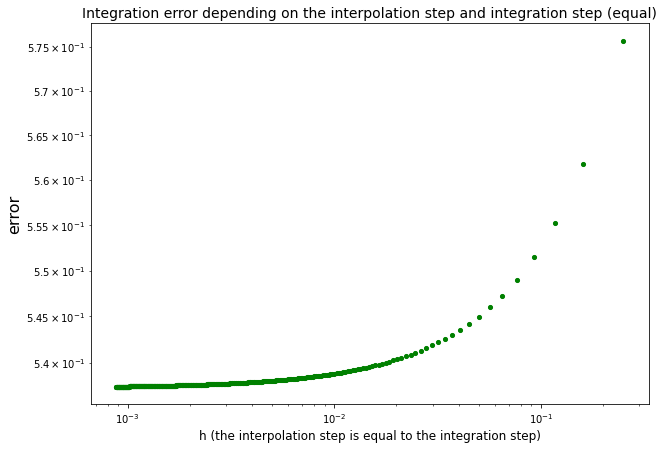

In [ ]:
approx_value = 0
exact_value_of_integral = np.sqrt(2*C/9.8)* (T - a)
steps = []
approx_values = []
plt.figure(figsize = (10, 7))
plt.loglog()
plt.title("Integration error depending on the interpolation step and integration step (equal)", fontsize = 14)
r = 10e-3
for i in range (3, 1000, 2):
  t = np.linspace(a, b, i)
  t1 = np.linspace(a, b, 2*len(t)+1)
  i = int(len(t1)/len(t))
  h = (b-a)/len(t1)
  r = h
  n = int((len(t1)/len(t)) + 1)
  k = 0
  for c in range (0, len(t)):
    t_cur = t1[k:k+n]
    k += n-1
    approx_value = approx_value + mod1_composite_simpson(r, i, f1, L, t_cur)
  steps.append(h)
  approx_values.append(np.abs(approx_value - exact_value_of_integral))
  plt.scatter(h, abs(approx_value - exact_value_of_integral), s = 17, color = 'green')
  approx_value = 0
plt.xlabel('h (the interpolation step is equal to the integration step)', fontsize = 12)
plt.ylabel('error',fontsize = 12)
plt.show()